In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import language_tools
import os
import openai
import dotenv
from PIL import Image
import matplotlib.pyplot as plt

dotenv.load_dotenv(".env", override=True)

def set_openai_key(key, org):
    """Sets OpenAI key."""
    openai.api_key = key
    openai.organization = org
    print("Openai credentials set.")

set_openai_key(os.getenv("OPENAI_API_KEY"), os.getenv("OPENAI_ORG"))


In [ ]:
EXAMPLE = 2

if EXAMPLE == 0:
    clusters = [
        ["sink", "toilet"],
        ["oven", "microwave", "fridge"],
        ["bed"]
    ]
    goal = "fork"
elif EXAMPLE == 1:
    clusters = [
        ["sink", "toilet"],
        ["shower", "bathtub"],
        ["bed"],
        ["chair", "couch"],
    ]
    goal = "toothbrush"
elif EXAMPLE == 2:
    clusters = [
        ["sink", "toilet"],
        ["shower", "bathtub"],
        ["bed"],
        ["chair", "computer"],
    ]
    goal = "pencil"

# Computing Positive Scores

In [ ]:
scores, reasoning = language_tools.query_llm(language_tools.LanguageMethod.SAMPLING_POSTIIVE, clusters, goal)
newline = '\n'
print(f"Queried LLM {len(reasoning)} times. The final language scores for each cluster are:{newline}{newline.join([f'{c}: {s}' for c, s in zip(clusters, scores)])}")

In [ ]:
aggregated_reasoning = language_tools.aggregate_reasoning(reasoning)
print(f"The following is a summary based on each of {len(reasoning)} queries:", "\n\n", aggregated_reasoning)

# Computing Negative Scores

In [ ]:
scores, reasoning = language_tools.query_llm(language_tools.LanguageMethod.SAMPLING_NEGATIVE, clusters, goal)
newline = '\n'
print(f"Queried LLM {len(reasoning)} times. The final language scores for each cluster are:{newline}{newline.join([f'{c}:  {s}' for c, s in zip(clusters, scores)])}")

In [ ]:
aggregated_reasoning = language_tools.aggregate_reasoning(reasoning)
print(f"The following is a summary based on each of {len(reasoning)} queries:", "\n\n", aggregated_reasoning)

# Using Robot Observations

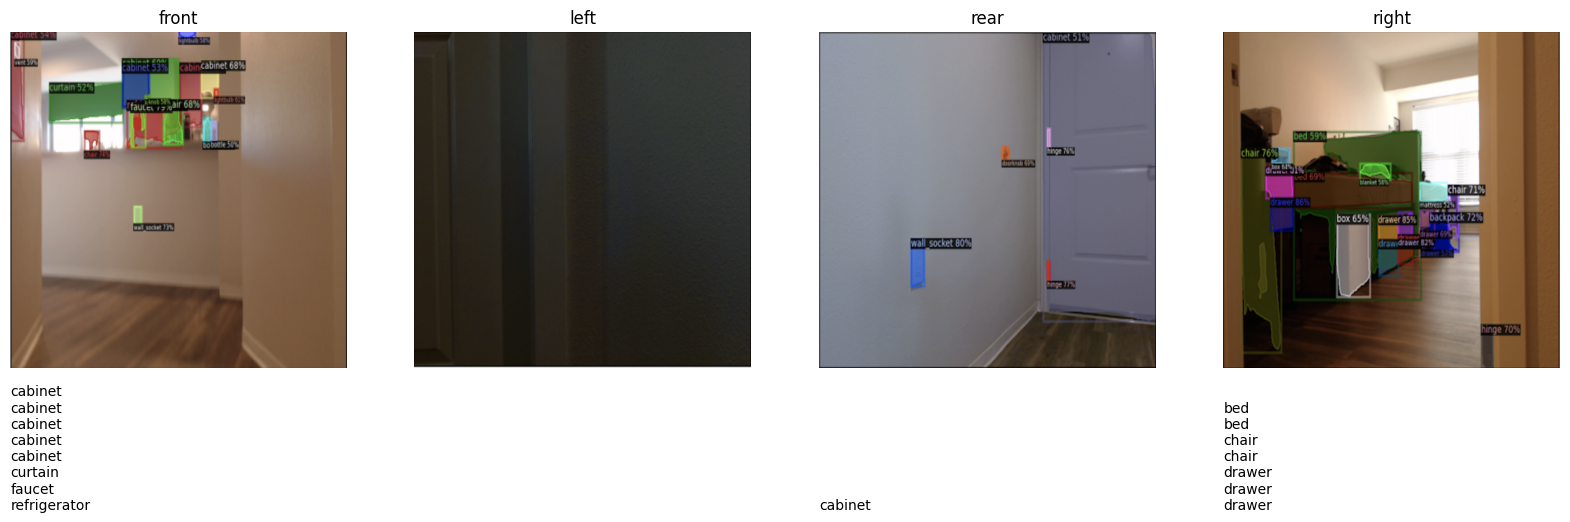

In [3]:
images = {}
images["front"] = Image.open("robot_observations/front.png")
images["left"] = Image.open("robot_observations/left.png")
images["rear"] = Image.open("robot_observations/rear.png")
images["right"] = Image.open("robot_observations/right.png")

goal = "shampoo" # CHANGE THIS
objects = {
    "front": ['cabinet', 'cabinet', 'cabinet', 'cabinet', 'cabinet', 'curtain', 'faucet', 'refrigerator'],
    "left": [],
    "rear": ['cabinet'],
    "right": ['bed', 'bed', 'chair', 'chair', 'drawer', 'drawer', 'drawer']
}


# Plot them side by side 
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for i, (key, img) in enumerate(images.items()):
    ax[i].imshow(img)
    ax[i].set_title(key)
    ax[i].axis("off")
    ax[i].text(0, 725, "\n".join(objects[key]), fontsize=10)
plt.show()

In [ ]:
scores, reasoning = language_tools.query_llm(language_tools.LanguageMethod.SAMPLING_POSTIIVE, objects.values(), goal)
print(f"Queried LLM {len(reasoning)} times. The final language scores for each cluster are:{newline}{newline.join([f'{c}: {s}' for c, s in zip(objects, scores)])}")
print("\n", f"Summary of {len(reasoning)} queries:", "\n", language_tools.aggregate_reasoning(reasoning))

In [ ]:
scores, reasoning = language_tools.query_llm(language_tools.LanguageMethod.SAMPLING_NEGATIVE, objects.values(), goal)
print(f"Queried LLM {len(reasoning)} times. The final language scores for each cluster are:{newline}{newline.join([f'{c}: {s}' for c, s in zip(objects, scores)])}")
print("\n", f"Summary of {len(reasoning)} queries:", "\n", language_tools.aggregate_reasoning(reasoning))